# Final, Mathieu Rundstrom

# 1. Analysis of the membership of $f_a$ into the scale $C_k, \alpha([ -1,1 ])$ 

We first analyze the condition of $f_a\in C^k([-1,1])$. We compute the $k$th derivative of $f_a$ .

$$
f_a^{(k)}(x) = a(a-1)\dots (a-k+1)x^{a-k}I_{]0,1]}
$$

Where $I$ is the indicator function. Thus, clearly $f_a^{(k)}(0) = 0$. For this $k$th derivative to be continuous, we require that $a-k> 0$. Thus, the maximum value of $k$ is the biggest integer $k$ s.t. $k<a$. Expressed explicitly

$$
k = \begin{cases}
a-1 & a\in \mathbb{N}\\
\lfloor a \rfloor & otherwise
\end{cases}
$$


We now analyze the condition of $f_a \in C^{0, \alpha}([−1,1])$. Suppose $x\leq0$, then $f(x) = 0$. Hence, wlog, the following analysis holds. We have for $\alpha \leq a$

\begin{align*}
\sup\limits_{-1\leq x, y\leq 1} \frac{\left|f_{a}(x) - f_{a}(y)\right|}{|x - y|^{\alpha}} &= \sup_{-1\leq x, y\leq 1} \frac{\left|x^a - y^a\right|}{|x - y|^{\alpha}}\\
&\leq \sup\limits_{-1\leq x, y\leq 1} \frac{\left|x - y\right|^a}{|x - y|^{\alpha}}\\
&= \sup\limits_{-1\leq x, y\leq 1} |x - y|^{a -\alpha}\\
&\leq 2^{a -\alpha}<\infty
\end{align*}

Hence, $f_{a} \in C^{k}([-1,1])$ and $f_{a}^{k} \in C^{0,\alpha}([-1,1])$ with $k$ as above.

Consider now $a < \alpha$. We have

\begin{align*}
\sup\limits_\_{-1\leq x, y\leq 1} \frac{\left|f_{a}(y) - f_{a}(x)\right|}{|y - x|^{\alpha}} & \geq \sup\limits_{-1\leq x\leq 1} \frac{\left|(2x)^a - x^a\right|}{|2x - x|^{\alpha}}\\
 &= (2^{a} - 1)\sup\limits_{-1\leq x\leq 1} x^{a - \alpha}\\
 &= \frac{1}{0}\\
 &= \infty\\
\end{align*}


Hence, we conclude that 

$$
\max\limits_{k, \alpha} k+\alpha = \begin{cases}
2a-1 & a\in \mathbb{N}\\
a+\lfloor a \rfloor & otherwise
\end{cases}
$$

# 2. Piecewise constant approximation of $f_a$

*Remark: We will reuse any code that is useful from previous lab assignments, e.g. Bernstein and Chebyshev related things.*

Similar to the midpoint rule, we approximate $f_a$ by its at the midpoint of each interval. If we have $n$ intervals, the intervals have length $\frac{1-(-1)}{n} = \frac{2}{n}$, and thus are of form $[-1+\frac{2k}{n}, -1+\frac{2(k+1)}{n}]$ for $k = 0, \dots, n-1$. The midpoint of the $k$-th interval is $\frac{2k +1}{n} -1$. To find in which interval $x$ is, we have, for $x<1$, the formula $k = \lfloor \frac{(x+1)n}{2} \rfloor$. For $x = 1$, it is easy to check manually. We plot some illustrative examples for different values of $a$ and $n$.

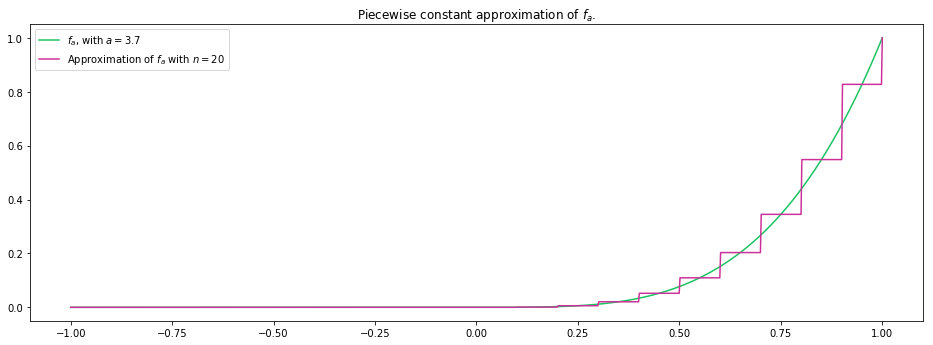

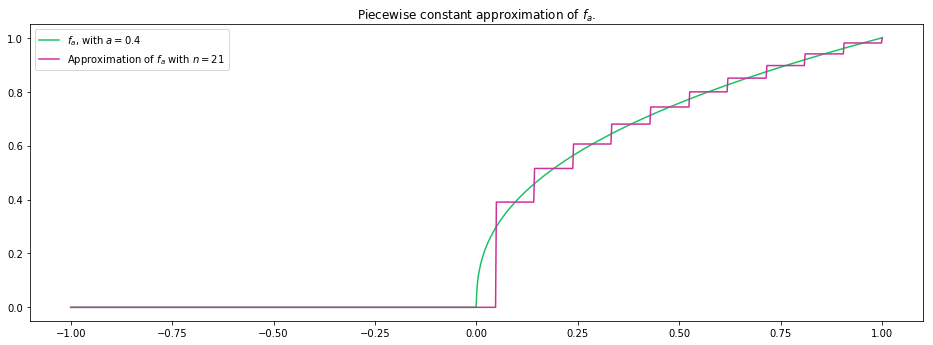

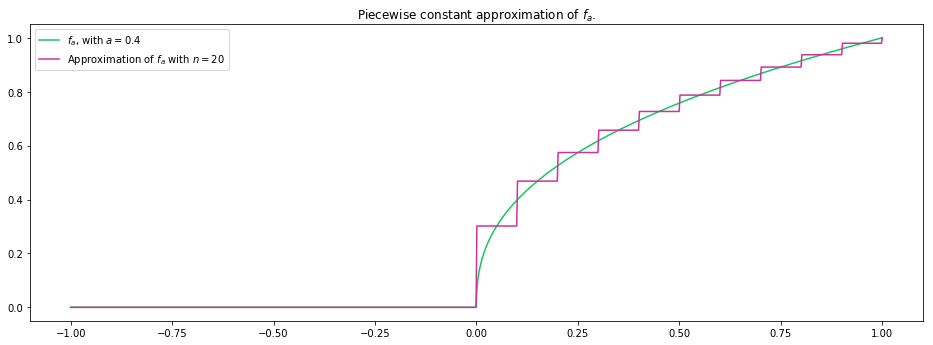

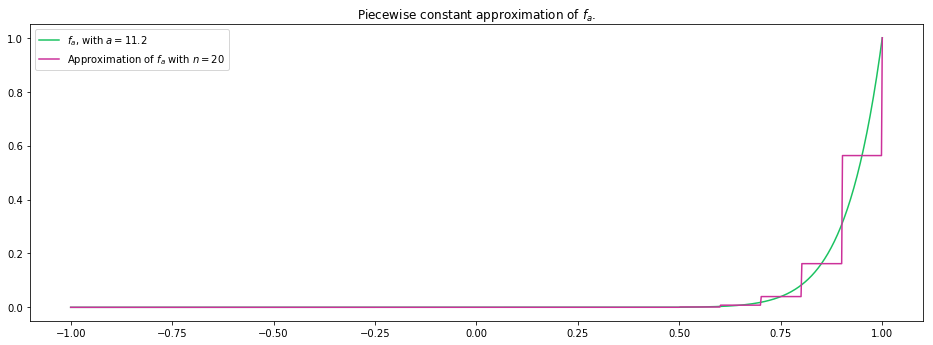

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
from functools import partial
import warnings
warnings.filterwarnings("ignore",category=mplt.cbook.mplDeprecation) #filtering some matplotlib warning


colors = ['#224647', '#FF3F62', '#1BC261', '#CC319A', '#009599']

def f(a,x):
    # This is the function f_a, a parameter
    return 0 if (x <= 0) else pow(x,a)

def pieceConst(n, f, x):
    # This function returns a function that approximates f, with piecewise constant functions on n uniform intervals of [-1,1]
    if x == 1: return 1 # any power of 1 is 1
    k = np.floor((x+1)*n/2) # x is in the k-th interval from the left
    return f((2*k+1)/n-1) # f of midpoint

for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    i=2
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 1000)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y, colors[i], label = '$f_a$, with $a=%.1f$'%(a))
    appfa = partial(pieceConst, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y, colors[i+1], label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Piecewise constant approximation of $f_a$.')
    plt.legend(loc='upper left')
plt.show()

As for the error approximation, we note that the maximum errors are at the boundaries of the interval; namely in the rightmost interval for $a\geq 1$, and in the interval after 0 for $a<1$.

Looking at the second and third plots, we see a difference with respect to teh parity of $n$. If $n$ is even, the highest error is at $x=0$, since the approximation changes there. It is equal to $f(m) -f(0) = f(m)$ where $m = \frac{1}{n}$, the midpoint of the interval right of 0. If $n$ is odd, the highest error is not at $x=0$, because 0 is the midpoint of an interval. Hence, it is in the right boundary point of the interval containing 0, which is at $\frac{1}{n}$. Hence, in both cases, we have error $f(\frac{1}{n})$.



We plot these errors as $n$ grows for different values of $a$ around 1. We observe that it indeed behaves like $n^{-r}$ for some $r$. We only see the assymptotic behavious in our graph because the scale makes the small values of $n$ less visible.

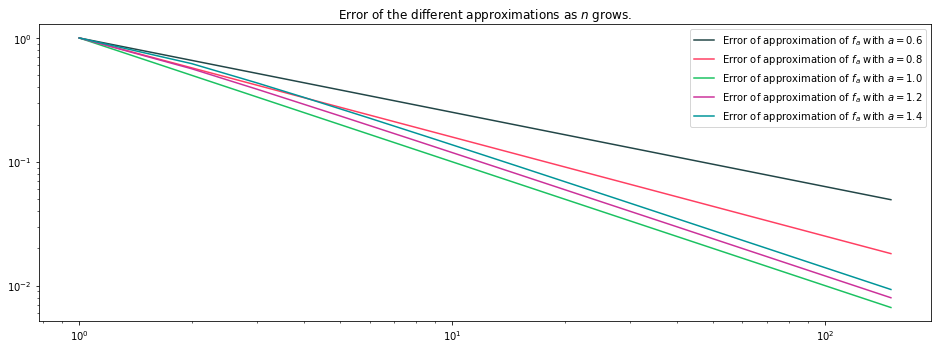

In [118]:
def err(f,a,n):
    # this function computes the error as described above
    return 1-f(1-1/n) if a >= 1 else f(1/n)

n = range(1,151)
val_A = [0.6,0.8,1,1.2, 1.4]

fig = plt.figure(figsize=(16,12))

for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    ax2 = fig.add_subplot(211)
    errf = partial(err, fa, val_A[i])
    errors = list(map(errf, n))
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))
    ax2.set_title(r'Error of the different approximations vs $n$')
    plt.legend(loc='upper right')
plt.show()


We confirm that the error grows like $n^{-r}$ for some $r$ that grows with the regularity of the function. This is because for values of $a$ closer to 0 or far from 1, the curves go down slowly and for values close to 1, the curves go down fast. The smoothness of the curves suggest an almost immediate aymptotic regime. The above graphs suggest that the rate of convergence is approximately equal to $n^{-a}$ for $a<1$, and $r\equiv 1$ for $a\geq 1$.

Theoretically, we make sense of this by the following argument. Let $\tilde{f}$ be the approximation. Then, since $f_a \sim \tilde{f}_a(x) = f_a(c)$, $\forall x\in(c-(2n)^{-1},c+(2n)^{-1})$. The Taylor expansion is:

$$f(x) = f(c) + f'(c)(x-c) + O((x-c)^{-2})$$

Thus 

$$f(x) - \tilde{f}(x) \le f'(c)n^{-1} + O(n^{-2}) = O(n^{-1})$$

Hence, our error cannot be better than $O(n^{-1})$, explaining that the rate of convergence does not increase for $a>1$. For $a<1$, $f_a \in C^{0,a}$. Hence, by Jackson's inequality 

$$E_nf\lesssim n^{-a}$$

giving a theoretical reason for our results.

# 3. Piecewise linear approximation of $f_a$

Similar to the trapezoidal rule, we approximate $f_a$ in each interval $[x_i, x_{i+1}]$ with a line connecting $f_a(x_{i})$ with $f_a(x_{i+1})$. We plot the same examples as with the piecewise constant.

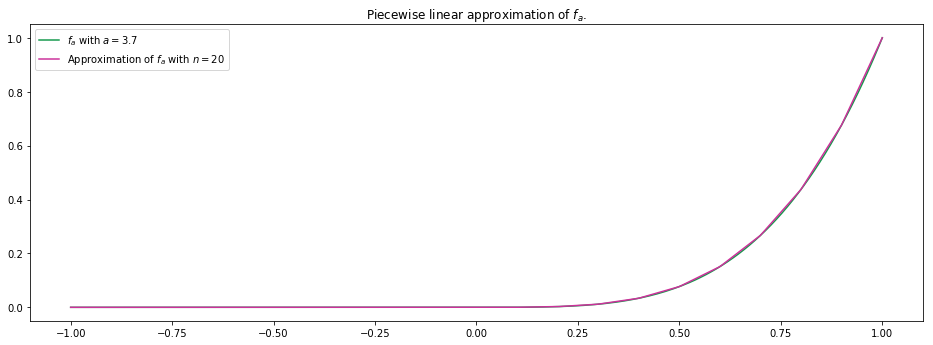

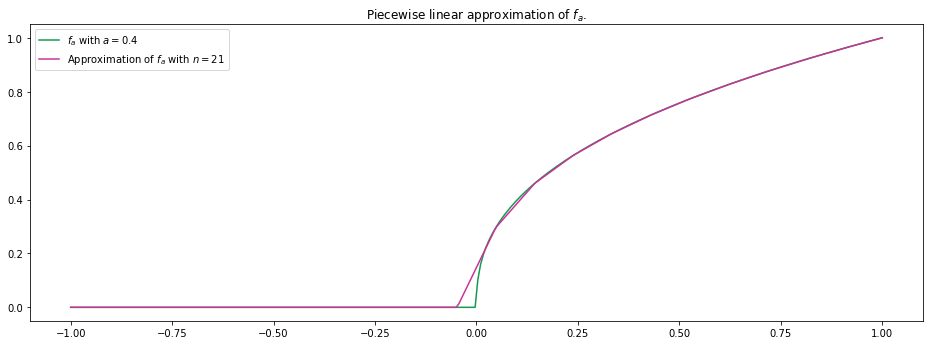

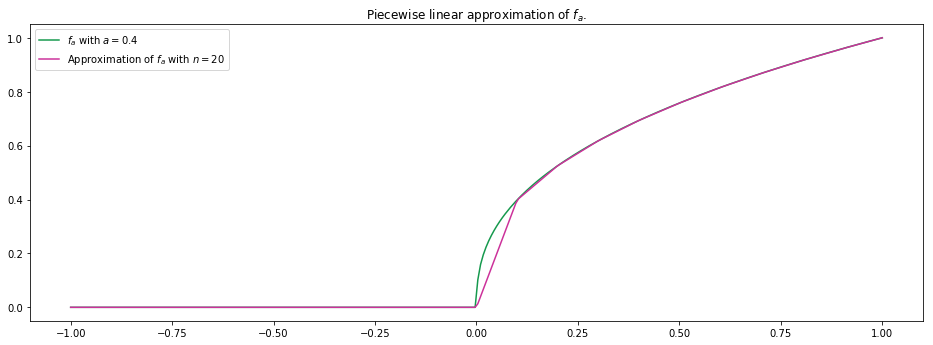

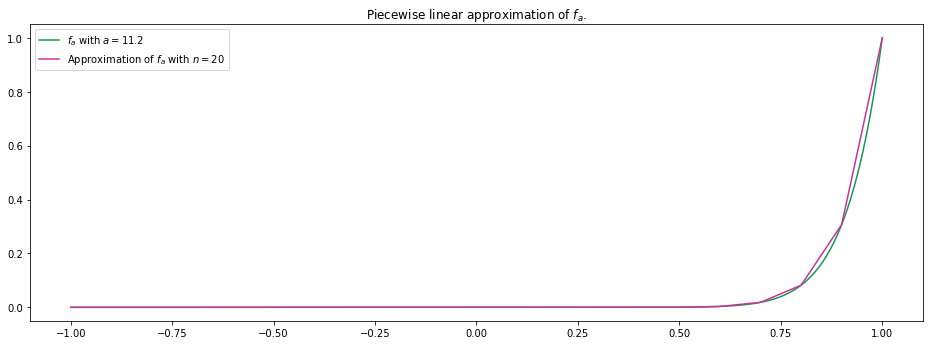

In [68]:
def pieceLin(n, f, x):
    # This function returns a function that approximates f, with piecewise constant functions on n uniform intervals of [-1,1]
    if x == 1: return 1 # # any power of 1 is 1
    k = np.floor((x+1)*n/2) # x is in the k-th interval from the left
    low, up = 2*k/n-1, 2*(k+1)/n-1 #boundary points of interval
    slope = (f(up) - f(low))*n/2 # getting slope
    y_inter = f(low) - slope*low 
    return slope*x+y_inter # f of the midpoint

for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y,colors[2], label = '$f_a$ with $a=%.1f$'%(a))
    appfa = partial(pieceLin, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y,colors[3], label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Piecewise linear approximation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()

In all the questions below, there is no clear simple way to find the error, we use some sample points, and maximize over those.

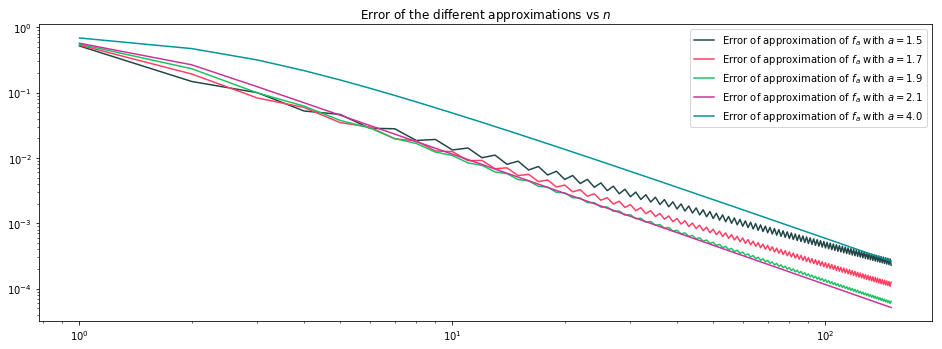

In [121]:
def unifNorm(f1, f2, low = -1, up = 1, numPoints = 10000):
    # approximates max norm of f1 and f2
    return max([abs(f1(p) - f2(p)) for p in np.linspace(low, up, numPoints)])

def errLin(f,n):
    appf = partial(pieceLin, n, f)
    return unifNorm(f, appf)

fig = plt.figure(figsize=(16,12))
n = range(1,151)
val_A = [1.5,1.7,1.9,2.1, 4]
for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    errf = partial(errLin, fa)
    errors = list(map(errf, n))
    #ax1.set_ylim([0.001,0.1])
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))

ax1.set_title(r'Error of the different approximations vs $n$')
plt.legend(loc='upper right')
plt.show()

First, we note that the degree of exactness here is one instead of zero. We again see that the error grows like $n^{-r}$ for some $r$, and is approximately equal to $n^{-a}$ for $a<2$. However, for greater values, the error does not seem to converge faster, as the slope is the same, the curve seems to just have undergone a positive vertical shift.

Theoretically, we make sense of this by the following argument. Let $\tilde{f}$ be the approximation. Then

$$\tilde{f}_a(x) = \frac{f_a(c+1/n)-f_a(c)}{1/n}(x-c)+f(c)$$

, $\forall x\in(c,c+1/n)$. Then, Taylor expansion: 

$$f(x) = f(c) + f'(c)(x-c) + O(n^{-2})$$

By the definition of the derivative at a point

$$f(x) - \tilde{f}(x) = O(n^{-2})$$

Hence, our error cannot be better than $O(n^{-2})$. For $a<1$, $f_a \in C^{0,a}$. Again, by Jackson the best approximation error is approximately less than $n^{-a}$. For $a\in(1,2)$, $f_a \in C^{1,\{a\}}$, so we expect $E_nf\lesssim n^{-1-\{a\}} = n^{-a}$. 

# 4. Bernstein polynomial approximation of $f_a$

The Bernstein polynomials are for $k = 0,\dots, n$

$$B_{n,k} (x) = \binom{n}{k} (1-x)^{n-k}x^k$$

The approximation of a function $f$ is $$ p_n(x) = \sum_{k=0}^n f(\frac{k}{n})B_{n,k}(x).$$ We scale to fit the domain as follows $x = \frac{x+1}{2}$.

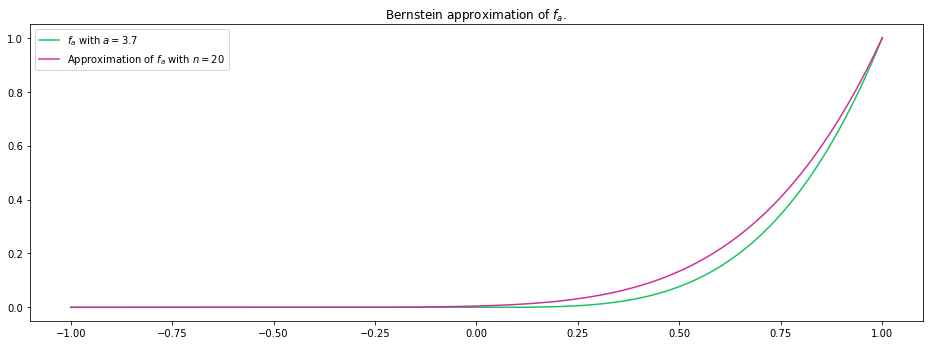

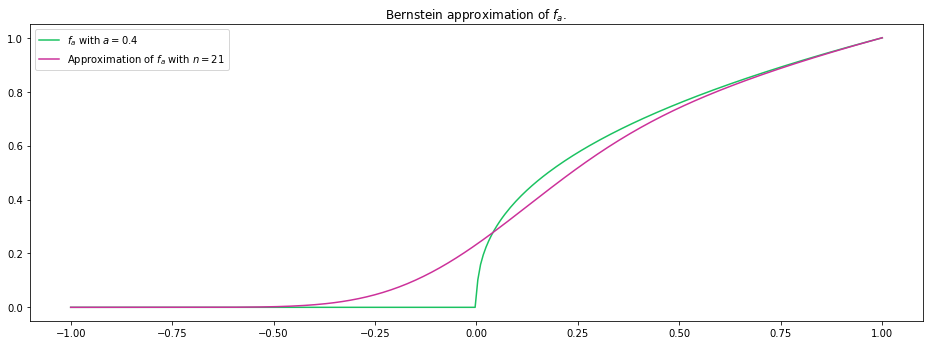

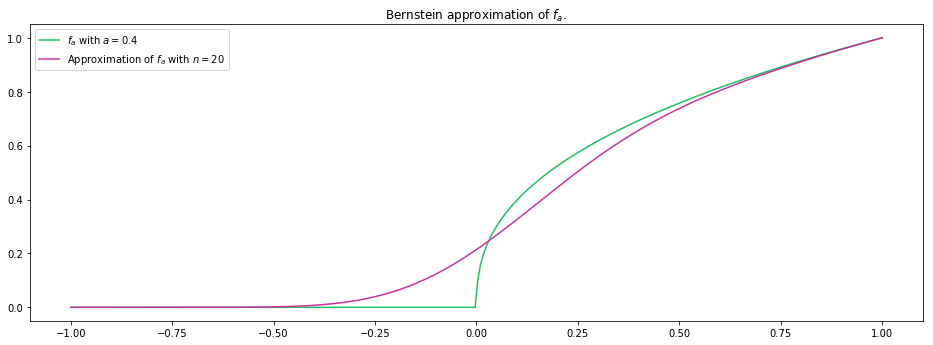

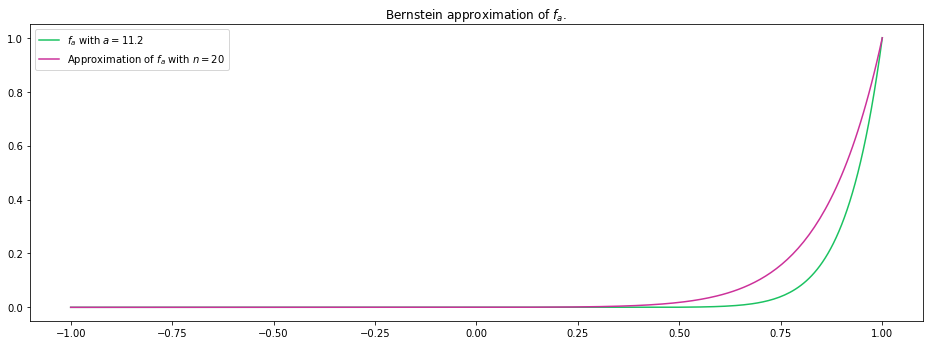

In [91]:
from scipy.special import binom
def bernPol(n,x,k):
    #This computes b_{n,k}(x)
    return binom(n,k)*pow(1-x,n-k)*pow(x,k)

def approxBern(n, f, x):
    # This computes the approximation of f at x in [-1,1]
    # with n-th order bernstein polynomials
    bern = partial(bernPol, n, (x+1)/2) #This is nth order bernstein polynomial at x with k as parameter
    return sum([f(-1+2*k/n)*bern(k) for k in range(n+1)])

for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y,colors[2], label = '$f_a$ with $a=%.1f$'%(a))
    appfa = partial(approxBern, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y,colors[3], label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Bernstein approximation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()

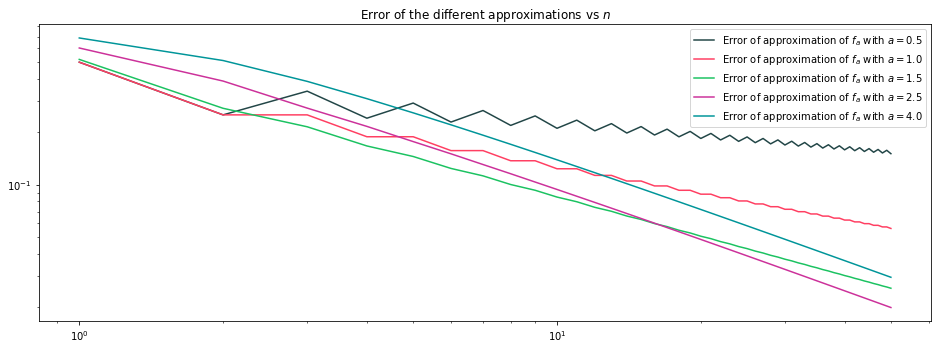

In [122]:
def errBern(f,n):
    appf = partial(approxBern, n, f)
    return unifNorm(f, appf)

fig = plt.figure(figsize=(16,12))
n = range(1,51)
val_A = [0.5,1,1.5,2.5, 4]
for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    errf = partial(errBern, fa)
    errors = list(map(errf, n))
    ax1 = fig.add_subplot(211)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))

ax1.set_title(r'Error of the different approximations vs $n$')
plt.legend(loc='upper right')
plt.show()

Once more, the error grows like $n^{-r}$ for some $r$. Nevertheless, not all the curves have the same rate of convergence. . In accordance to the piecewise constant approximation, we appear to have a ceiling at $r=1$, when $a\sim2$. However, in contrast with that method, we get a rate of approximately $n^\frac{a}{2}$ for $a<2$. The error is much less than in the previous cases.

This is in lign with the theory, which states that $f\in C^{0,\alpha}$, $\left| \left| f-B_nf \right| \right| \lesssim n^{-\alpha/2}$, which explains our observations for $a<2$.

# 5. Chebyshev interpolation of $f_a$

We use Lagrange interpolation on Chebyshev nodes to approximate $f_a$.

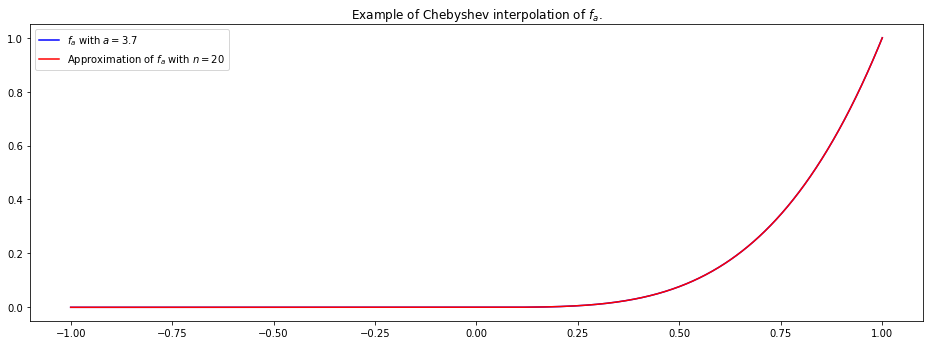

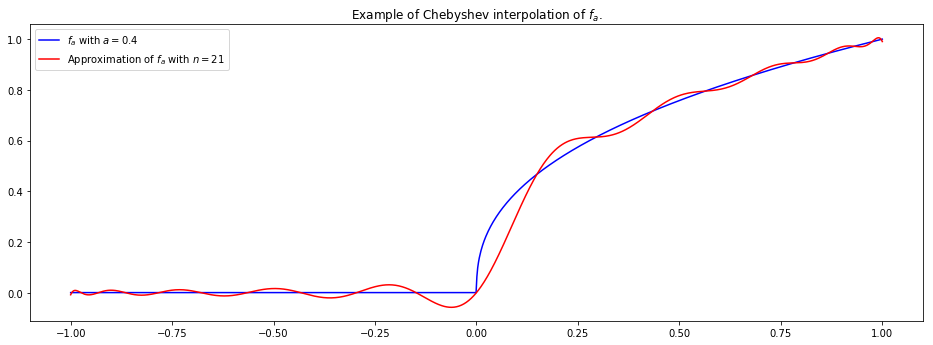

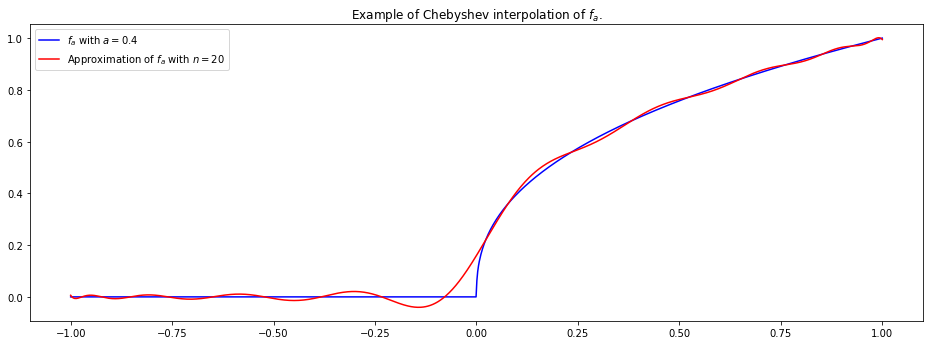

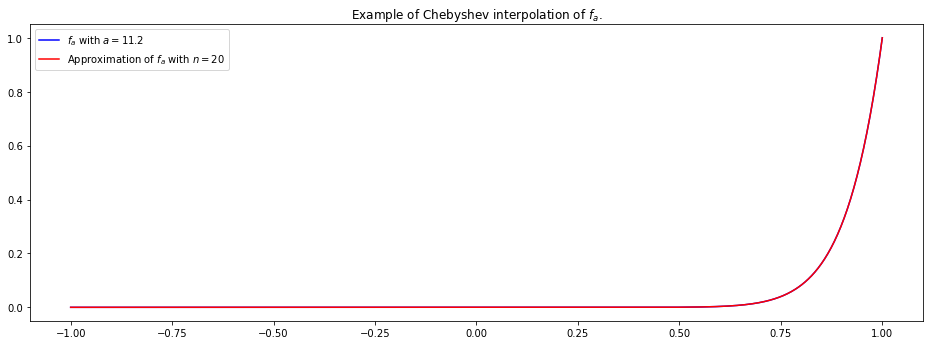

In [94]:
def evalPoly(a, x):
    # evaluates polynomial
    return sum([a[i]*pow(x,i) for i in range(len(a))])

def lagrange(x, y):
    #returns lagrange
    vmonde = np.zeros((len(x), len(x))) 
    for i in range(len(vmonde)): 
        for j in range(len(vmonde)):
            vmonde[i,j] = pow(x[i], j) 
    return np.linalg.solve(vmonde, y) 

def cheb(n):
    # gives the Chebyshev nodes
    return [np.cos((2*i-1)*np.pi/(2*n)) for i in range(1,n+1)]

for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    fa = partial(f,a)
    nodes = cheb(n)
    coeffs = lagrange(nodes,list(map(fa,nodes)))
    appfa = partial(evalPoly, coeffs)
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 1000)
    y = list(map(fa, x))
    ax1.plot(x,y,'b', label = '$f_a$ with $a=%.1f$'%(a))
    y = list(map(appfa, x))
    ax1.plot(x,y,'r', label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Example of Chebyshev interpolation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()


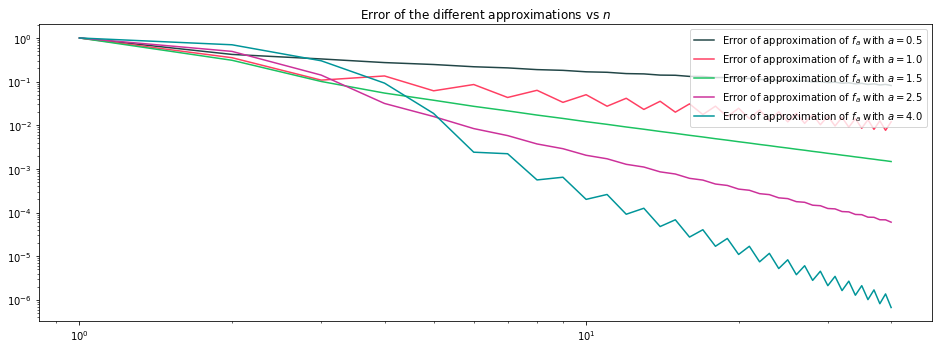

In [120]:
def errCheb(f,n):
    nodes = cheb(n)
    coeffs = lagrange(nodes,list(map(f,nodes)))
    appf = partial(evalPoly, coeffs)
    return unifNorm(f, appf, -1,1, 1000)

fig = plt.figure(figsize=(16,12))
n = range(1,41)
val_A = [0.5,1,1.5,2.5, 4]
for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    errf = partial(errCheb, fa)
    errors = list(map(errf, n))
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))

ax1.set_title(r'Error of the different approximations vs $n$')
plt.legend(loc='upper right')
plt.show()

The difference here is quite striking, equal to $n^a$, without any maximum rate of convergence, at least for our experimental values, noting also that the asymptotic behaviour starts later for greater $a$.

Applying the same reasoning as in previous parts, we have for some $\xi$

$$f(x)-L_n(x) = \frac{(x-x_0)...(x-x_n)}{n!}f^{(n+1)}(\xi)$$ 

where, by definition, Chebyshev nodes minimize the product $(x-x_0)...(x-x_n)$. Hence, the error is "freer" then in previous cases. Furthermore

$$\left| \left| f - L_nf \right| \right| \le C \frac{\log n}{n^a} $$

explaining the above somewhat slower slope in the error versus $n$ graphs.